In [1]:
import eagleSqlTools as est
import numpy as np

In [2]:
conn = est.connect("lzm898", "YB854nic", "http://virgodb.dur.ac.uk:8080/MyMillennium")

In [3]:
query1="SELECT gal.x, gal.y, gal.z, halo.m200_crit FROM McAlpine2022a..galaxy as gal, McAlpine2022a..halo as halo WHERE mstars_disk+mstars_bulge >1e10 AND gal.hosthaloid=halo.hosthaloid AND gal.rank=0"

In [4]:
res1=est.execute_query(conn, query1)

In [5]:
np.save('res1.npy', res1)

In [6]:
xyzm = np.load('res1.npy')

In [13]:
s=len(xyzm)
halo_mass=np.zeros(s)
for i in range(s):
    halo_mass[i]=xyzm[i][3]
#print (halo_mass)
r_vec=np.zeros((s,3))
r_scal=np.zeros(s)
for i in range(s):
    r_scal[i]=np.sqrt(xyzm[i][0]**2+xyzm[i][1]**2+xyzm[i][2]**2)
    r_vec[i]=np.array([xyzm[i][0], xyzm[i][1], xyzm[i][2]])
acc_tot=0
acc_sca=np.zeros(s)
acc_scal=np.zeros(s)
G=4.301*10**(-9)
for i in range(s):
    acc_sca[i]=G*halo_mass[i]/(r_scal[i]**3)
    acc_scal[i]=acc_sca[i]/(3.08*10**19)*10**3
    acc_tot=acc_tot+acc_scal[i]*r_vec[i]
    #print(acc_scal[i]*r_vec[i])
    #print (acc1[i])
    #print (r_vect[i])
print(acc_tot)
v_MW=600000 #m/s velocity of Milky Way
age=4.37*10**17 # seconds age of the universe
a=v_MW/age
#print(a)
a_mag=np.sqrt(acc_tot[0]**2+acc_tot[1]**2+acc_tot[2]**2)
#print(a_mag)

[-1.31789914e-13  1.33275476e-13  1.76494570e-14]


In [9]:
## we got total acceleration 10 times smaller than v_MW/age
#Let uscalculate the separate accelerations from each halos we took

In [11]:
a_cart=np.zeros((s,3))
for i in range(s):
    a_cart[i]=acc_scal[i]*r_vec[i]
#print (a_cart)
#print(a_cart.shape)

In [15]:
# now let us see hoe many halos give comparable acceleration to v_MW/age
#print(a_cart)
k=0
#print(a_cart)
for i in range(s):
    if np.sqrt(a_cart[i][0]**2+a_cart[i][1]**2+a_cart[i][2]**2)>=a:
        k=k+1
print(k)

0


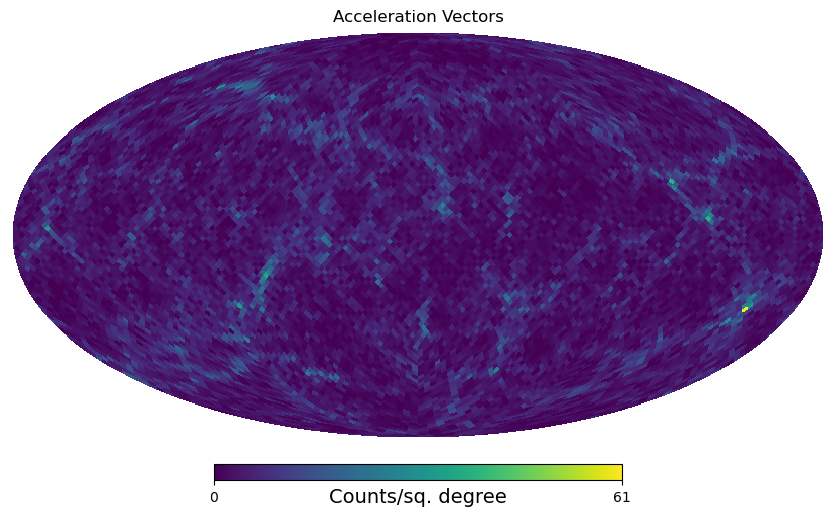

In [20]:
#putting already known acceleration vectors


import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, CartesianRepresentation
import matplotlib.pyplot as plt
import healpy as hp

Nside = 32
npix = hp.nside2npix(Nside)
vecs = a_cart
# convert sky coordinates to Galactic coordinates and then in pixels
pix_indices=hp.pixelfunc.vec2pix(Nside, list(vecs[:,0]*u.dimensionless_unscaled),
        list(vecs[:,1]*u.dimensionless_unscaled),
        list(vecs[:,2]*u.dimensionless_unscaled))

# Compute the number of acceleration vectors in each pixel
counts, _ = np.histogram(pix_indices, bins=hp.nside2npix(Nside), weights=None)

# Plot the skymap
hp.mollview(counts, title='Acceleration Vectors', unit='Counts/sq. degree')



In [21]:
##Now let us change the mass constraint and get halos for galaxies for which mstars_bulge+mstars_disk >=3*10^10

In [24]:
query2="SELECT gal.x, gal.y, gal.z, halo.m200_crit FROM McAlpine2022a..galaxy as gal, McAlpine2022a..halo as halo WHERE mstars_disk+mstars_bulge >3*1e10 AND gal.hosthaloid=halo.hosthaloid AND gal.rank=0"

In [25]:
res2=est.execute_query(conn, query2)

In [31]:
np.save('res2.npy', res2)

In [32]:
xyzm2 = np.load('res2.npy')

In [33]:
s2=len(xyzm2)
halo_mass2=np.zeros(s2)
for i in range(s2):
    halo_mass2[i]=xyzm2[i][3]
#print (halo_mass)
r_vec2=np.zeros((s2,3))
r_scal2=np.zeros(s2)
for i in range(s2):
    r_scal2[i]=np.sqrt(xyzm2[i][0]**2+xyzm2[i][1]**2+xyzm2[i][2]**2)
    r_vec2[i]=np.array([xyzm2[i][0], xyzm2[i][1], xyzm2[i][2]])
acc_tot2=0
acc_sca2=np.zeros(s2)
acc_scal2=np.zeros(s2)
G=4.301*10**(-9)
for i in range(s2):
    acc_sca2[i]=G*halo_mass2[i]/(r_scal2[i]**3)
    acc_scal2[i]=acc_sca2[i]/(3.08*10**19)*10**3
    acc_tot2=acc_tot2+acc_scal2[i]*r_vec2[i]
    #print(acc_scal[i]*r_vec[i])
    #print (acc1[i])
    #print (r_vect[i])
print(acc_tot2)
v_MW=600000 #m/s velocity of Milky Way
age=4.37*10**17 # seconds age of the universe
a=v_MW/age
#print(a)
a_mag2=np.sqrt(acc_tot2[0]**2+acc_tot2[1]**2+acc_tot2[2]**2)
#print(a_mag)

[-1.37227215e-13  1.07164030e-13 -4.46674216e-14]


In [35]:
a_cart2=np.zeros((s2,3))
for i in range(s2):
    a_cart2[i]=acc_scal2[i]*r_vec2[i]

In [36]:
k2=0
#print(a_cart)
for i in range(s2):
    if np.sqrt(a_cart2[i][0]**2+a_cart2[i][1]**2+a_cart2[i][2]**2)>=a:
        k2=k2+1
print(k2)

0


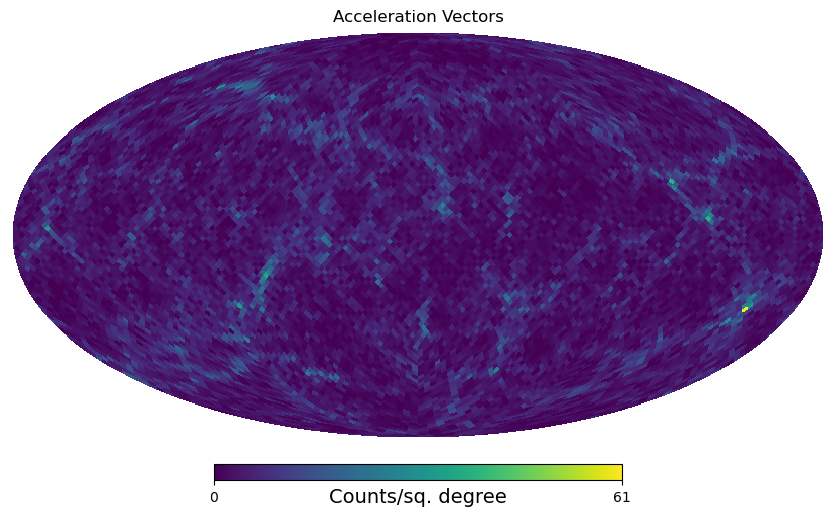

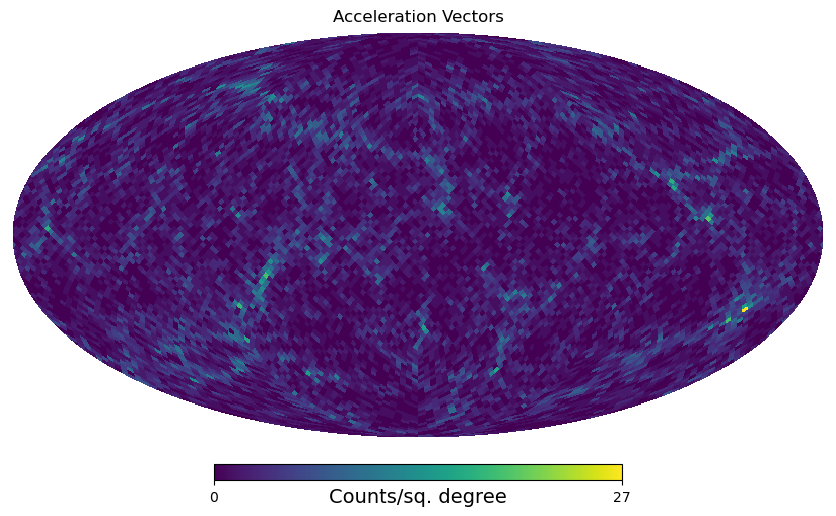

In [53]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, CartesianRepresentation
import matplotlib.pyplot as plt
import healpy as hp

Nside2 = 32
npix2 = hp.nside2npix(Nside2)
vecs2 = a_cart2
# convert sky coordinates to Galactic coordinates and then in pixels
pix_indices2=hp.pixelfunc.vec2pix(Nside2, list(vecs2[:,0]*u.dimensionless_unscaled),
        list(vecs2[:,1]*u.dimensionless_unscaled),
        list(vecs2[:,2]*u.dimensionless_unscaled))

# Compute the number of acceleration vectors in each pixel
counts2, _ = np.histogram(pix_indices2, bins=hp.nside2npix(Nside2), weights=None)

# Plot the skymap
hp.mollview(counts, title='Acceleration Vectors', unit='Counts/sq. degree')
hp.mollview(counts2, title='Acceleration Vectors', unit='Counts/sq. degree')

In [40]:
##Let us do another constraint, mstars_bulge+mstars_disk>=10^11

In [55]:
query3="SELECT gal.x, gal.y, gal.z, halo.m200_crit FROM McAlpine2022a..galaxy as gal, McAlpine2022a..halo as halo WHERE mstars_disk+mstars_bulge >1e8 AND gal.hosthaloid=halo.hosthaloid AND gal.rank=0"

In [56]:
res3=est.execute_query(conn, query3)

In [57]:
np.save('res3.npy', res3)

In [58]:
xyzm3 = np.load('res3.npy')

In [59]:
s3=len(xyzm3)
halo_mass3=np.zeros(s3)
for i in range(s3):
    halo_mass3[i]=xyzm3[i][3]
#print (halo_mass)
r_vec3=np.zeros((s3,3))
r_scal3=np.zeros(s3)
for i in range(s3):
    r_scal3[i]=np.sqrt(xyzm3[i][0]**2+xyzm3[i][1]**2+xyzm3[i][2]**2)
    r_vec3[i]=np.array([xyzm3[i][0], xyzm3[i][1], xyzm3[i][2]])
acc_tot3=0
acc_sca3=np.zeros(s3)
acc_scal3=np.zeros(s3)
G=4.301*10**(-9)
for i in range(s3):
    acc_sca3[i]=G*halo_mass3[i]/(r_scal3[i]**3)
    acc_scal3[i]=acc_sca3[i]/(3.08*10**19)*10**3
    acc_tot3=acc_tot3+acc_scal3[i]*r_vec3[i]
    #print(acc_scal[i]*r_vec[i])
    #print (acc1[i])
    #print (r_vect[i])
print(acc_tot3)
v_MW=600000 #m/s velocity of Milky Way
age=4.37*10**17 # seconds age of the universe
a=v_MW/age
#print(a)
a_mag3=np.sqrt(acc_tot3[0]**2+acc_tot3[1]**2+acc_tot3[2]**2)
#print(a_mag)

[-2.34999215e-14  3.06381035e-13  2.60278992e-13]


In [60]:
a_cart3=np.zeros((s3,3))
for i in range(s3):
    a_cart3[i]=acc_scal3[i]*r_vec3[i]
#print (a_cart)
#print(a_cart.shape)

In [62]:
# now let us see hoe many halos give comparable acceleration to v_MW/age
#print(a_cart)
k3=0
#print(a_cart)
for i in range(s3):
    if np.sqrt(a_cart3[i][0]**2+a_cart3[i][1]**2+a_cart3[i][2]**2)>=a:
        k3=k3+1
print(k)

0


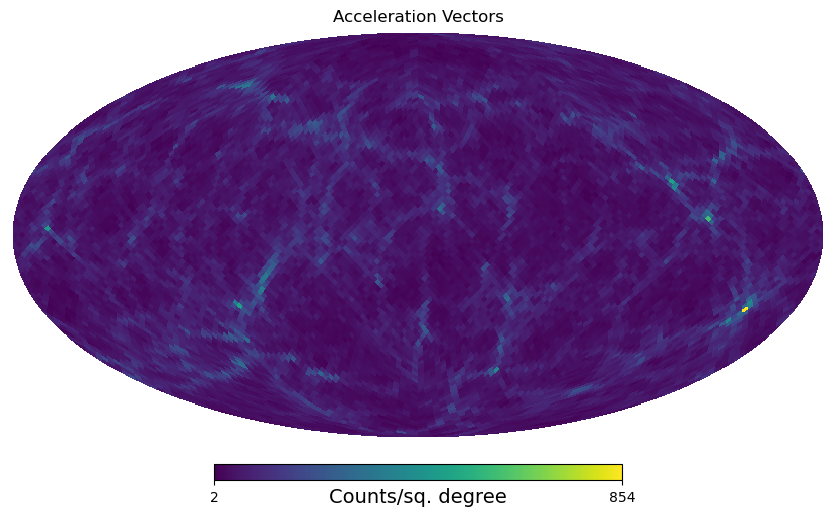

In [63]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, CartesianRepresentation
import matplotlib.pyplot as plt
import healpy as hp

Nside3 = 32
npix3 = hp.nside2npix(Nside3)
vecs3 = a_cart3
# convert sky coordinates to Galactic coordinates and then in pixels
pix_indices3=hp.pixelfunc.vec2pix(Nside3, list(vecs3[:,0]*u.dimensionless_unscaled),
        list(vecs3[:,1]*u.dimensionless_unscaled),
        list(vecs3[:,2]*u.dimensionless_unscaled))

# Compute the number of acceleration vectors in each pixel
counts3, _ = np.histogram(pix_indices3, bins=hp.nside2npix(Nside3), weights=None)

# Plot the skymap
hp.mollview(counts3, title='Acceleration Vectors', unit='Counts/sq. degree')